In [0]:
import pandas as pd
import pandas_datareader as dr
from matplotlib import pyplot as plt
import numpy as np


In [0]:
sp100_url = 'https://en.wikipedia.org/wiki/S%26P_100'
data_table = pd.read_html(sp100_url)

In [0]:
tickers = data_table[2]['Symbol'].values 


In [0]:
tickers = np.append(tickers, np.array('^GSPC'))

In [5]:
prices_list = []
length = len(tickers)
for i, ticker in enumerate(tickers):
    if i % 20 == 0:
        print("{}/{}".format(i, length))
    try:
        prices = dr.DataReader(ticker,'yahoo','06/05/2012')['Adj Close']
        prices = pd.DataFrame(prices)
        prices.columns = [ticker]
        prices_list.append(prices)
    except:
        pass
    prices_df = pd.concat(prices_list,axis=1)
 
prices_df.sort_index(inplace=True)
 

0/102
20/102
40/102
60/102
80/102
100/102


In [0]:

all_prices = prices_df.dropna(how='any', axis = 1)

In [43]:
all_prices.columns

Index(['AAPL', 'ABT', 'ACN', 'ADBE', 'AGN', 'AIG', 'ALL', 'AMGN', 'AMZN',
       'AXP', 'BA', 'BAC', 'BIIB', 'BK', 'BKNG', 'BLK', 'BMY', 'C', 'CAT',
       'CELG', 'CHTR', 'CL', 'CMCSA', 'COF', 'COP', 'COST', 'CSCO', 'CVS',
       'CVX', 'DD', 'DHR', 'DIS', 'DUK', 'EMR', 'EXC', 'F', 'FB', 'FDX', 'GD',
       'GE', 'GILD', 'GM', 'GOOG', 'GOOGL', 'GS', 'HD', 'HON', 'IBM', 'INTC',
       'JNJ', 'JPM', 'KMI', 'KO', 'LLY', 'LMT', 'LOW', 'MA', 'MCD', 'MDLZ',
       'MDT', 'MET', 'MMM', 'MO', 'MRK', 'MS', 'MSFT', 'NEE', 'NFLX', 'NKE',
       'NVDA', 'ORCL', 'OXY', 'PEP', 'PFE', 'PG', 'PM', 'QCOM', 'RTN', 'SBUX',
       'SLB', 'SO', 'SPG', 'T', 'TGT', 'TXN', 'UNH', 'UNP', 'UPS', 'USB',
       'UTX', 'V', 'VZ', 'WBA', 'WFC', 'WMT', 'XOM', '^GSPC'],
      dtype='object')

In [0]:
from statsmodels.tsa.stattools import coint

def find_cointegrated_pairs(data):
  n = data.shape[1]
  score_matrix = np.zeros((n, n))
  pvalue_matrix = np.ones((n, n))
  keys = data.keys()
  pairs = [] # We store the stock pairs that are likely to be cointegrated
  for i in range(n):
    for j in range(i+1, n):
      S1 = data[keys[i]]
      S2 = data[keys[j]]
      result = coint(S1, S2)
      score = result[0] # t-score
      pvalue = result[1]
      score_matrix[i,j] = score
      pvalue_matrix[i, j] = pvalue
      if pvalue < 0.02:
        pairs.append((keys[i], keys[j]))
  return score_matrix, pvalue_matrix, pairs

### NOTE:

Since we are choosing pairs based on all data available, this will introduce look-ahead bias. 

Hence, the final result is not to be taken seriously. This is meant for me to familiarise myself with the idea behind pairs trading. 

In [0]:
scores, pvalues, pairs = find_cointegrated_pairs(all_prices)

In [46]:
scores.shape

(97, 97)

In [0]:
import seaborn
m = [0, 0.2, 0.4, 0.6, 0.8, 1]

'''

seaborn.heatmap(pvalues, xticklabels=tickers,
               yticklabels=tickers, cmap='RdYlGn_r',
               mask = (pvalues >= 0.98))

'''

pass

In [24]:
len(pairs)

101

In [25]:
print(pairs)

[('ACN', 'HD'), ('ACN', 'NEE'), ('AGN', 'CVS'), ('AIG', 'CELG'), ('ALL', 'LMT'), ('ALL', 'ORCL'), ('ALL', 'USB'), ('ALL', '^GSPC'), ('AMGN', 'DUK'), ('AMGN', 'LMT'), ('AMGN', 'LOW'), ('AMGN', 'MDT'), ('AMGN', 'PEP'), ('AMGN', 'UPS'), ('BK', 'BKNG'), ('BK', 'DD'), ('BK', 'GD'), ('BK', 'MMM'), ('BKNG', 'GD'), ('BKNG', 'RTN'), ('BKNG', 'UPS'), ('BKNG', 'USB'), ('BLK', 'RTN'), ('BLK', 'UPS'), ('C', 'GM'), ('CHTR', 'USB'), ('CL', 'CMCSA'), ('CL', 'FB'), ('CL', 'UPS'), ('CMCSA', 'DUK'), ('CMCSA', 'ORCL'), ('CMCSA', 'PEP'), ('CMCSA', 'USB'), ('COF', 'GD'), ('COF', 'MS'), ('COST', 'MSFT'), ('COST', 'V'), ('CSCO', 'EXC'), ('CSCO', 'VZ'), ('DD', 'FDX'), ('DHR', 'NEE'), ('DIS', 'MDLZ'), ('DUK', 'JNJ'), ('DUK', 'KO'), ('DUK', 'LOW'), ('DUK', 'MRK'), ('DUK', 'ORCL'), ('DUK', 'PEP'), ('DUK', 'VZ'), ('EXC', 'MA'), ('EXC', 'ORCL'), ('EXC', 'UNP'), ('EXC', 'VZ'), ('FB', 'JNJ'), ('FB', 'LMT'), ('FB', 'RTN'), ('FB', 'UPS'), ('FB', 'USB'), ('GD', 'UPS'), ('GD', 'USB'), ('GM', 'MET'), ('GM', 'UTX'), ('GOOG

In [26]:
all_prices[['BLK', 'UPS']].shape

(1812, 2)

In [27]:
S1 = all_prices['BLK']
S2 = all_prices['UPS']
score, pvalue, _ = coint(S1, S2)

score, pvalue # t-score, p-value

# low p-value indicates that the stocks are likely to be cointegrated

(-3.8960381429364066, 0.010044954247790103)

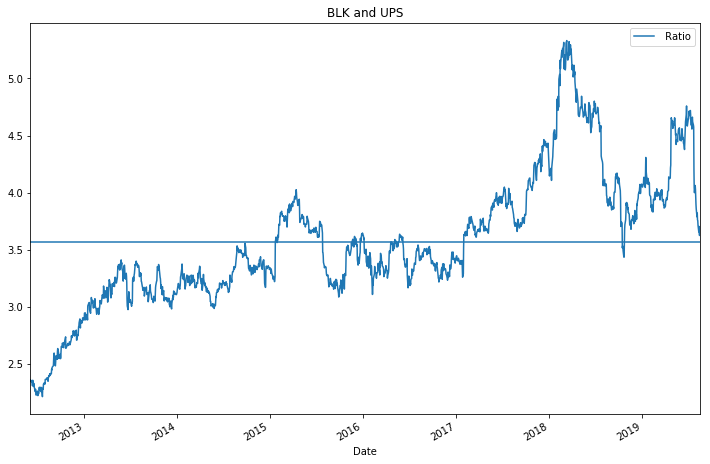

In [28]:
am_ratios = S1 / S2

am_ratios.plot(
    
    figsize = (12, 8)

)

plt.axhline(am_ratios.mean())
plt.title('BLK and UPS')
plt.legend([' Ratio'])

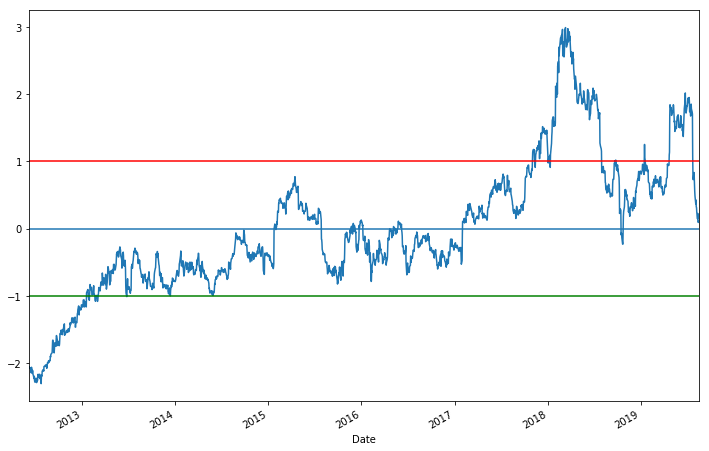

In [29]:
## https://sebastianraschka.com/Articles/2014_about_feature_scaling.html
## min-max scaling vs z-score normalization

def zscore(series):
  # z-score normalization (standardization)
  return (series - series.mean()) / np.std(series)

zscore(am_ratios).plot(

  figsize = (12, 8)

)

plt.axhline(zscore(am_ratios).mean())
plt.axhline(1.0, color='red')
plt.axhline(-1.0, color='green')
plt.show()

In [0]:
from sklearn.model_selection import train_test_split

ratio = all_prices['BLK'] / all_prices['UPS']

train, test = train_test_split(ratio, test_size = 0.3, shuffle = False)

## Feature Engineering

We need to find out what features are actually important in determining the direction of the ratio moves. Knowing that the ratios always eventually revert back to the mean, maybe the moving averages and metrics related to the mean will be important.

Let's try using these features:

- 60 day Moving Average of Ratio
- 5 day Moving Average of Ratio
- 60 day Standard Deviation
- z score


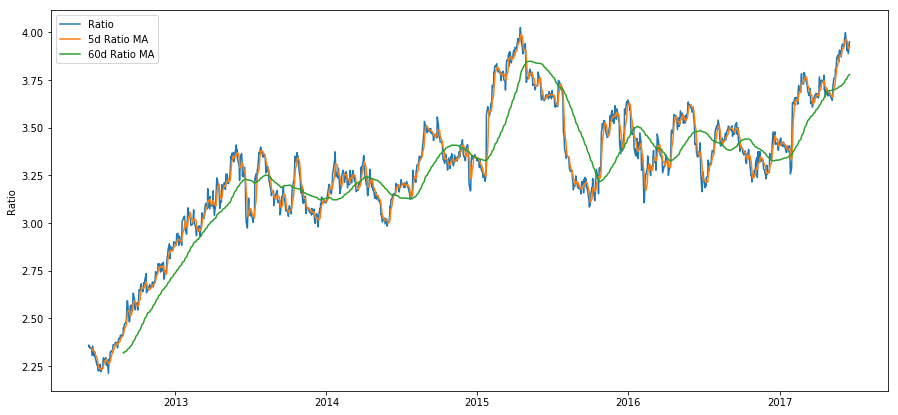

In [33]:
ratios_mavg5 = train.rolling(window=5, center=False).mean()

ratios_mavg60 = train.rolling(window=60, center=False).mean()

std_60 = train.rolling(window=60, center=False).std()

zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60

plt.figure(figsize=(15, 7))
plt.plot(train.index, train.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg60.index, ratios_mavg60.values)

plt.legend(['Ratio', '5d Ratio MA', '60d Ratio MA'])

plt.ylabel('Ratio')
plt.show()

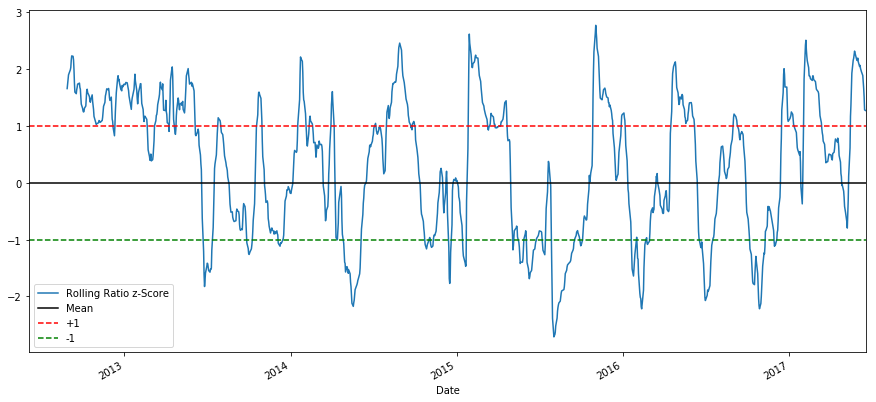

In [34]:
plt.figure(figsize=(15,7))

zscore_60_5.plot() # moving average z-scores

plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.show()


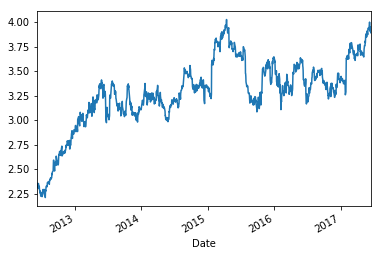

In [49]:
train.plot()

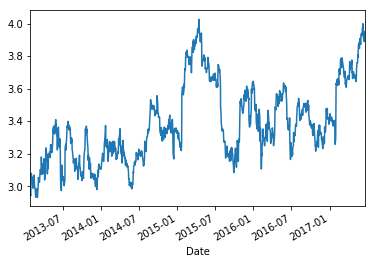

In [51]:
train[160:].plot()

## Creating a Model
Taking a look at our z-score chart, it's pretty clear that if the absolute value of the z-score gets too high, it tends to revert back. We can keep using our +1/-1 ratios as thresholds, and we can create a model to generate a trading signal:

- Buy (1) whenever the z-score is below -1.0 because we expect the ratio to increase
- Sell (-1) whenever the z-score is above 1.0 because we expect the ratio to decrease

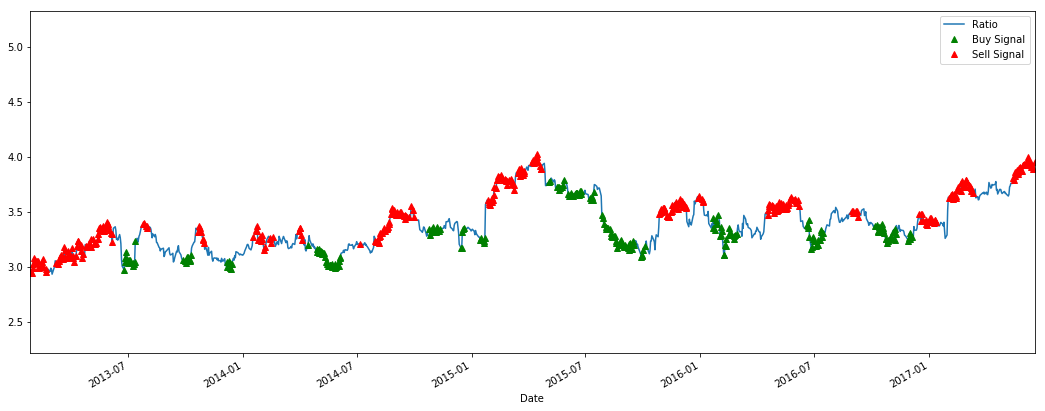

In [36]:
plt.figure(figsize=(18,7))

train[160:].plot()

buy = train.copy()
sell = train.copy()

buy[zscore_60_5 > -1] = 0 # because we want to buy if z_score < -1 
sell[zscore_60_5 < 1] = 0 # because we want to sell if z_score > 1

buy[160:].plot(color='g', linestyle='None', marker='^')
sell[160:].plot(color='r', linestyle='None', marker='^')

x1, x2, y1, y2 = plt.axis()

plt.axis((x1, x2, ratio.min(), ratio.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()

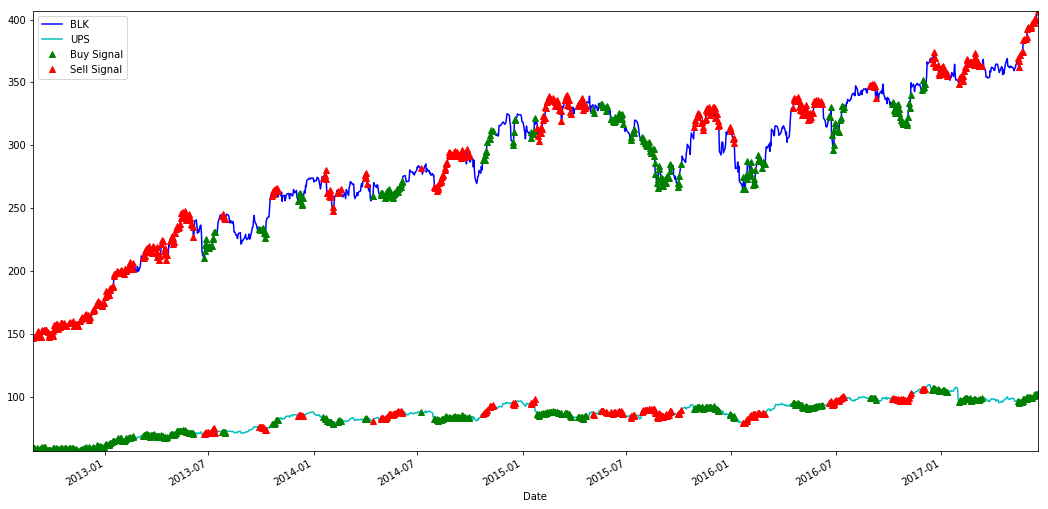

In [38]:
plt.figure(figsize=(18,9))

S1, S1_test = train_test_split(all_prices['BLK'], test_size = 0.3, shuffle = False)
S2, S2_test = train_test_split(all_prices['UPS'], test_size = 0.3, shuffle = False)

S1[60:].plot(color='b')
S2[60:].plot(color='c')

buyR = 0*S1.copy()
sellR = 0*S1.copy()

# When you buy the ratio, you buy stock S1 and sell S2
# i.e. when zscore_60_5 < -1
buyR[buy!=0] = S1[buy!=0]
sellR[buy!=0] = S2[buy!=0]

# When you sell the ratio, you sell stock S1 and buy S2
# i.e. when zscore_60_5 > 1
buyR[sell!=0] = S2[sell!=0]
sellR[sell!=0] = S1[sell!=0]

buyR[60:].plot(color='g', linestyle='None', marker='^')
sellR[60:].plot(color='r', linestyle='None', marker='^')

x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, min(S1.min(), S2.min()), max(S1.max(), S2.max())))

plt.legend(['BLK', 'UPS', 'Buy Signal', 'Sell Signal'])
plt.show()

In [0]:
# Trade using a simple strategy
def trade(S1, S2, window1, window2):
    
    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0
    
    # Compute rolling mean and rolling standard deviation
    ratios = S1/S2
    
    ma1 = ratios.rolling(window=window1,
                               center=False).mean()
    ma2 = ratios.rolling(window=window2,
                               center=False).mean()
    std = ratios.rolling(window=window2,
                        center=False).std()
    zscore = (ma1 - ma2)/std
    
    # Simulate trading
    # Start with no money and no positions
    money = 0
    countS1 = 0
    countS2 = 0
    
    for i in range(len(ratios)):
        # Sell short if the z-score is > 1 because we expect the ratio to decrease 
        # Buy long if the z-score is < -1 because we expect the ratio to increase
        
        # When you buy the ratio, you buy stock S1 and sell S2
        # i.e. when zscore_60_5 < -1
        # because we expect the price of S1 to increase, and price of S2 to decrease 

        # When you sell the ratio, you sell stock S1 and buy S2
        # i.e. when zscore_60_5 > 1
        
        if zscore[i] < -1:
            money += S1[i] - S2[i] * ratios[i]
            countS1 -= 1
            countS2 += ratios[i]
            #print('Selling Ratio %s %s %s %s'%(money, ratios[i], countS1,countS2))
            
        
        elif zscore[i] > 1:
            money -= S1[i] - S2[i] * ratios[i]
            countS1 += 1
            countS2 -= ratios[i]
            #print('Buying Ratio %s %s %s %s'%(money,ratios[i], countS1,countS2))
            
        # Clear positions if the z-score between -.5 and .5
        elif abs(zscore[i]) < 0.75:
            money += S1[i] * countS1 + S2[i] * countS2
            countS1 = 0
            countS2 = 0
            #print('Exit pos %s %s %s %s'%(money,ratios[i], countS1,countS2))
            
            
    return money

In [57]:
trade(S1, S2, 60, 5)

2005.872529981559

In [42]:
trade(S1_test, S2_test, 60, 5)

5295.54873730818